In [3]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = '/content/drive/MyDrive/medicine.csv'
df = pd.read_csv(file_path)

In [6]:
df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Description']

,Description
0,Mild to moderate acne (spots)
1,A RET 0.025% is a prescription medicine that i...
2,It is used to treat acne vulgaris in people 12...
3,It is used to treat acne vulgaris in people 12...
4,treat the most severe form of acne (nodular ac...
...,...
9715,used for treating warts
9716,used to soften the skin cells
9717,used for scars
9718,used for wounds


In [10]:
df['Description'].apply(lambda x: x.split())

,Description
0,"[Mild, to, moderate, acne, (spots)]"
1,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,"[treat, the, most, severe, form, of, acne, (no..."
...,...
9715,"[used, for, treating, warts]"
9716,"[used, to, soften, the, skin, cells]"
9717,"[used, for, scars]"
9718,"[used, for, wounds]"


In [11]:
 df['Reason'] = df['Reason'].apply(lambda x: x.split())
 df['Description'] = df['Description'].apply(lambda x: x.split())

In [12]:
df['Description'] = df['Description'].apply(lambda x: [i.replace(' ','') for i in x])

In [13]:
df['tags'] = df['Description'] + df['Reason']

In [14]:
new_df = df[['index','Drug_Name','tags']]

In [15]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [16]:
new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(x))

In [17]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts Wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells Wound
9717,9718,Wokadine M Onit 10gm,used for scars Wound
9718,9719,Wound Fix Solution 100ml,used for wounds Wound


In [18]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

In [19]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells wound
9717,9718,Wokadine M Onit 10gm,used for scars wound
9718,9719,Wound Fix Solution 100ml,used for wounds wound


In [20]:
import nltk

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [23]:
def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [24]:
new_df['tags'] = new_df['tags'].apply(stem)

In [25]:
cv.fit_transform(new_df['tags']).toarray().shape

(9720, 806)

In [26]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [27]:
cv.get_feature_names_out()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
cosine_similarity(vectors)

array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [30]:
similarity = cosine_similarity(vectors)

In [31]:
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

In [32]:
def recommand(medicine):
  medicine_index=new_df[new_df['Drug_Name']==medicine].index[0]
  distances=similarity[medicine_index]
  medicines_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x: x[1]) [1:6]
  for i in medicines_list:
    print(new_df.iloc[i[0]].Drug_Name)


In [33]:
recommand("Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S")

Oxypamol D Tablet 10'S
Pacimol MF Tablet 10'S
Painil Plus 100/500mg Tablet 10'S
Pamagin Plus Gel 30gm
Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S


<class 'pandas.core.frame.DataFrame'>
Index: 9626 entries, 0 to 9658
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    9626 non-null   object
 1   Reason       9626 non-null   object
 2   Description  9626 non-null   object
dtypes: object(3)
memory usage: 300.8+ KB
None
                                           Drug_Name Reason  \
0               A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2                             ACGEL CL NANO Gel 15gm   Acne   
3                                ACGEL NANO Gel 15gm   Acne   
4                              Acleen 1% Lotion 25ml   Acne   

                                         Description  
0                      Mild to moderate acne (spots)  
1  A RET 0.025% is a prescription medicine that i...  
2  It is used to treat acne vulgaris in people 12...  
3  It is used to treat acne vulgaris in people 1

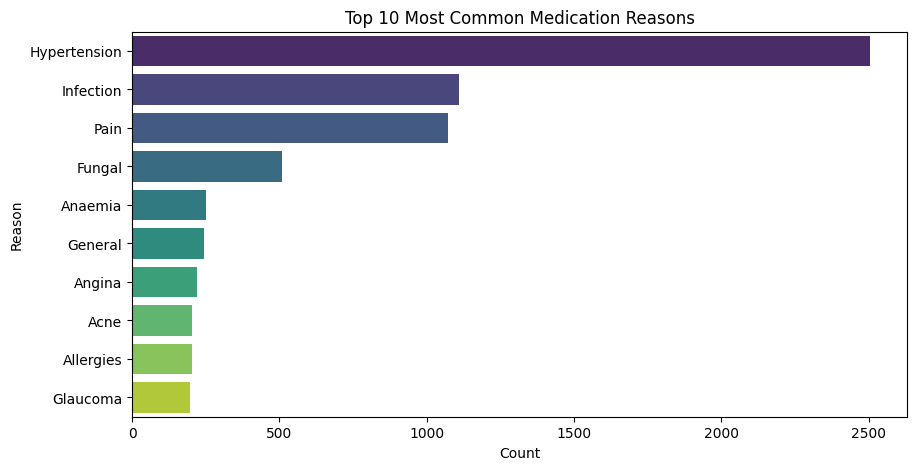

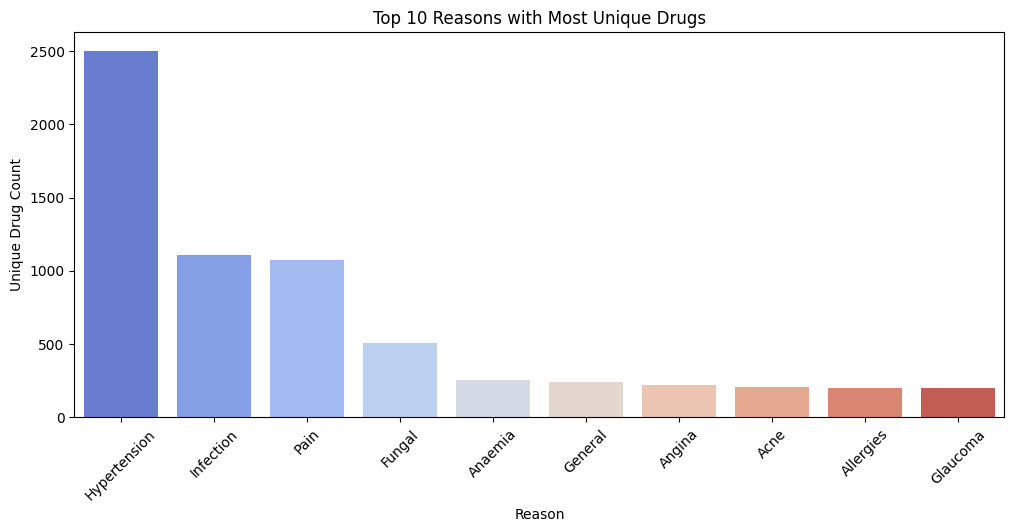

Random Forest Accuracy: 0.9839044652128764
                   precision    recall  f1-score   support

             Acne       0.86      1.00      0.93        44
             Adhd       0.00      0.00      0.00         2
        Allergies       1.00      0.88      0.93        40
        Alzheimer       0.96      1.00      0.98        26
       Amoebiasis       1.00      0.67      0.80         6
          Anaemia       0.97      1.00      0.98        58
           Angina       1.00      1.00      1.00        38
          Anxiety       1.00      1.00      1.00        22
         Appetite       1.00      1.00      1.00        13
    Arrhythmiasis       1.00      1.00      1.00         3
        Arthritis       0.97      1.00      0.99        36
         Cleanser       1.00      1.00      1.00         8
     Constipation       1.00      1.00      1.00        12
    Contraception       1.00      1.00      1.00        24
         Dandruff       1.00      1.00      1.00        11
       Depre

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/medicine.csv')

# Drop the unnecessary index column
df.drop(columns=['index'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Ensure 'Description' column is of string type
df['Description'] = df['Description'].astype(str)

# Display basic info
print(df.info())
print(df.head())

# Visualization: Most common reasons for medications
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Reason'], order=df['Reason'].value_counts().index[:10], palette='viridis')
plt.xlabel("Count")
plt.ylabel("Reason")
plt.title("Top 10 Most Common Medication Reasons")
plt.show()

# Further analysis: Check distribution of drug names per reason
drug_counts = df.groupby('Reason')['Drug_Name'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=drug_counts.index[:10], y=drug_counts.values[:10], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Reason")
plt.ylabel("Unique Drug Count")
plt.title("Top 10 Reasons with Most Unique Drugs")
plt.show()

# Machine Learning Preparation
# Feature Extraction (TF-IDF on Drug Description)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Description'])
y = df['Reason']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Decision Tree Model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Support Vector Machine (SVM) Model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Random Forest Accuracy: 0.9839044652128764
                   precision    recall  f1-score   support

             Acne       0.86      1.00      0.93        44
             Adhd       0.00      0.00      0.00         2
        Allergies       1.00      0.88      0.93        40
        Alzheimer       0.96      1.00      0.98        26
       Amoebiasis       1.00      0.67      0.80         6
          Anaemia       0.97      1.00      0.98        58
           Angina       1.00      1.00      1.00        38
          Anxiety       1.00      1.00      1.00        22
         Appetite       1.00      1.00      1.00        13
    Arrhythmiasis       1.00      1.00      1.00         3
        Arthritis       0.97      1.00      0.99        36
         Cleanser       1.00      1.00      1.00         8
     Constipation       1.00      1.00      1.00        12
    Contraception       1.00      1.00      1.00        24
         Dandruff       1.00      1.00      1.00        11
       Depre

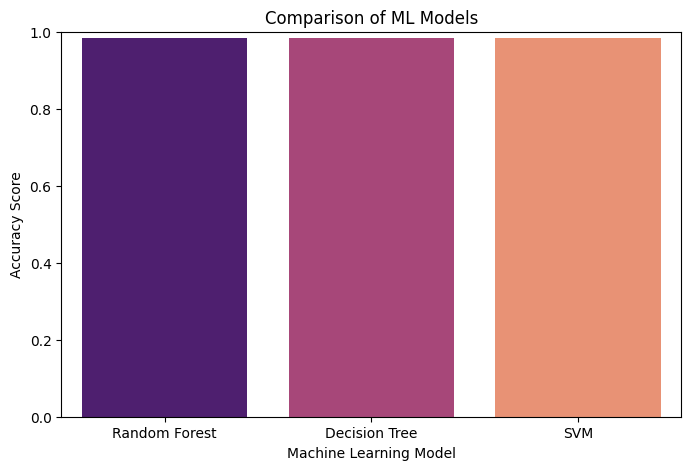

In [45]:
# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, y_pred_rf))

# Decision Tree Model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)
print(classification_report(y_test, y_pred_dt))

# Support Vector Machine (SVM) Model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)
print(classification_report(y_test, y_pred_svm))

# Model Comparison
models = ['Random Forest', 'Decision Tree', 'SVM']
accuracies = [rf_acc, dt_acc, svm_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='magma')
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy Score")
plt.title("Comparison of ML Models")
plt.ylim(0, 1)
plt.show()


In [46]:
# Prediction and Recommendations Example
example_patient = df.iloc[0]  # Selecting the first record as an example
example_description = vectorizer.transform([example_patient['Description']])
predicted_reason = rf_clf.predict(example_description)[0]
recommended_meds = df[df['Reason'] == predicted_reason]['Drug_Name'].unique()

print(f"Example Patient's Condition: {example_patient['Reason']}")
print(f"Predicted Condition Based on Description: {predicted_reason}")
print(f"Recommended Medications: {', '.join(recommended_meds)}")

Example Patient's Condition: Acne
Predicted Condition Based on Description: Acne
Recommended Medications: A CN Gel(Topical) 20gmA CN Soap 75gm, A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0.025% Gel 20gm, ACGEL CL NANO Gel 15gm, ACGEL NANO Gel 15gm, Acleen 1% Lotion 25ml, Aclene 0.10% Gel 15gm, Acnay Gel 10gm, Acne Aid Bar 50gmAcne Aid Bar 100gm, Acne UV Gel 60gm, Acne UV SPF 30 Gel 30gm, Acnecure Gel 20gm, Acnedap Gel 15gm, Acnedap Plus Gel 15gm, Acnehit Gel 15gm, Acnelak Soap 75gm, Acnelak Clz Cream 15gm, Acnelak Z Lotion 15gm, Acnemoist Cream 60gm, Acnerex Soap 75gm, Acneril 1% Gel 10gmAcneril Tablet 10Acneril 0.10% Cream 20gm, Acnesol 1% Solution 25mlAcnesol Gel 20gmAcnesol Solution 45ml, Acnesol A Nano Gel 15gm, Acnesol CL Gel 15gm, Acnestal Soap 75gm, Acnestar 10mg Capsule 10'SAcnestar 2.5% Soap 75gmAcnestar S Soap 75gmAcnestar 20mg Capsule 10'S, Acnetoin 20mg Capsule 10'SAcnetoin Gel 15gm, Acnetoin Plus Oinment 15gm, Acnetor AD 1% Ointment 15gm, Acnetor AD Cream 15Acnetor AD Ge

In [47]:
# Prediction and Recommendations Example
example_patient = df.iloc[0]  # Selecting the first record as an example
example_description = vectorizer.transform([example_patient['Description']])
predicted_reason = rf_clf.predict(example_description)[0]
recommended_med = df[df['Reason'] == predicted_reason]['Drug_Name'].unique()[0]

print(f"Example Patient's Condition: {example_patient['Reason']}")
print(f"Predicted Condition Based on Description: {predicted_reason}")
print(f"Recommended Medication: {recommended_med}")


Example Patient's Condition: Acne
Predicted Condition Based on Description: Acne
Recommended Medication: A CN Gel(Topical) 20gmA CN Soap 75gm
